# Flongle Experiments


In [1]:
from read_clustering.variant_call import VariantCalls
threshold = 0.5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import re

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
twoprimeo_pos = [ 648,  649,  662,  804,  806,  816,  866,  875,  897,  907, 1132,
       1436, 1448, 1449, 1887, 2196, 2219, 2255, 2279, 2280, 2287, 2336,
       2346, 2416, 2420, 2618, 2639, 2723, 2728, 2790, 2792, 2814, 2920,
       2921, 2945, 2947, 2958, 27,   99,  413,  419,  435,  540,  561,  577,  618,  795,  973,
       1006, 1125, 1268, 1270, 1427, 1571, 1638]

twoprimeo_pos_25 = [ 648,  649,  662,  804,  806,  816,  866,  875,  897,  907, 1132,
       1436, 1448, 1449, 1887, 2196, 2219, 2255, 2279, 2280, 2287, 2336,
       2346, 2416, 2420, 2618, 2639, 2723, 2728, 2790, 2792, 2814, 2920,
       2921, 2945, 2947, 2958]

twoprimeo_pos_18 = [27,   99,  413,  419,  435,  540,  561,  577,  618,  795,  973,
       1006, 1125, 1268, 1270, 1427, 1571, 1638]

In [3]:
pseduo_u_pos = [ 775,  959,  965,  985,  989, 1003, 1041, 1051, 1055, 1109, 1123,
       2128, 2132, 2190, 2257, 2259, 2263, 2265, 2313, 2339, 2348, 2350,
       2415, 2734, 2825, 2864, 2879, 2922, 2943, 2974, 105,  119,  210,  301,  465,  631,  758,  765,  998, 1180, 1186,
       1289, 1414]
pseduo_u_pos_18 = [105,  119,  210,  301,  465,  631,  758,  765,  998, 1180, 1186,
       1289, 1414]
pseduo_u_pos_25 = [ 775,  959,  965,  985,  989, 1003, 1041, 1051, 1055, 1109, 1123,
       2128, 2132, 2190, 2257, 2259, 2263, 2265, 2313, 2339, 2348, 2350,
       2415, 2734, 2825, 2864, 2879, 2922, 2943, 2974]


In [4]:
ivt_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/depletion/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0/all_variant_calls/template_hmm30/canonical_ivt.csv"
native_cbf5_gal_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/depletion/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0/all_variant_calls/template_hmm30/native_cbf5_gal.csv"
cbf5_glu_psu_depletion_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/depletion_cbf5_glu_round30_alt_canonical_supervised_500_500.model.csv"
nop58_glu_2o_depletion_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/depletion_nop58_glu_round30_alt_canonical_supervised_500_500.model.csv"       


all_file_paths = [ivt_path, cbf5_glu_psu_depletion_path, nop58_glu_2o_depletion_path, native_cbf5_gal_path]
all_labels = ["ivt", "cbf5_glu_psu_depletion", "nop58_glu_2o_depletion", "cbf5_gal"]



# cbf5_glu_psu_depletion_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/depletion/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0/all_variant_calls/template_hmm30/run_cbf5_glu.csv"
# nop58_glu_2o_depletion_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/depletion/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0/all_variant_calls/template_hmm30/run_nop_glu.csv"       

# # YWD448a: loss psu @ 18-759; 25-775(776)
# YWD448a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/mutant448_YPD.csv"
# # YWD451a: loss psu @ 18-1289
# YWD451a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/mutant451_YPD.csv"
# # YWD452a: loss of 2'Ome @ 18-436
# YWD452a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/mutant452_YPD.csv"
# # WT_CY: cycloheximide
# WT_CY = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/WT_CY.csv"
# # WT_CY: Potassium Acetate
# WT_KOAC = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/WT_KOAC.csv"
# # actual wildtype
# WT_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/WT_YPD.csv"

# ROUND 2 experiments
# stationary phase
WT_stationary = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_stationary.csv"
# deletion of Dbp3d (a DEAD box protein important for processing 2'Ome snoRNAs U18 and U24)
Dbp3d_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/Dbp3d_YPD.csv"
# PB (an RNA splicing inhibitor)
WT_PB = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_PB.csv"
# rapamycin treatment for 5 hours (activates the TOR kinase pathway that regulates cell growth and ribosome biogenesis)
WT_rapa5 = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_rapa5.csv"
# deletion of Trl1 (Manny showed this is important for making intron circles, which seem to me enriched for introns that encode snoRNAs)
trl1d_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/trl1d_YPD.csv"

YWD448a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/mutant448_YPD.csv"
# YWD451a: loss psu @ 18-1289
YWD451a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/mutant451_YPD.csv"
# YWD452a: loss of 2'Ome @ 18-436
YWD452a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/mutant452_YPD.csv"
# WT_CY: cycloheximide
WT_CY = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_CY.csv"
# WT_CY: Potassium Acetate
WT_KOAC = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_KOAC.csv"
# actual wildtype
WT_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_YPD.csv"

prp43_18deg = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/prp43_18deg.csv"
mix = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/Mix.csv"


file_paths = [YWD448a, YWD451a, YWD452a, WT_CY, WT_KOAC, WT_YPD]
labels = ["YWD448a", "YWD451a", "YWD452a", "WT_CY", "WT_KOAC", "WT_YPD"]
all_file_paths.extend(file_paths)
all_labels.extend(labels)

In [5]:
# depletions 1
all_file_paths = [WT_YPD, cbf5_glu_psu_depletion_path, nop58_glu_2o_depletion_path, ivt_path]
all_labels = ["1: wild type", "2: CBF5 PseudoU depletion", "3: NOP58 2'O-Methyl depletion", "4: ivt"]


In [18]:
# knockouts
# all_file_paths = [WT_YPD, YWD448a, YWD451a, YWD452a]
# all_labels = ["1: wild type", "2: 448a", "3: 451a", "4: 452a"]


In [36]:
# all_file_paths = [WT_YPD, ivt_path, cbf5_glu_psu_depletion_path, nop58_glu_2o_depletion_path]
# all_labels = ["1: wild type", "2: ivt", "2: CBF5 PseudoU depletion", "3: NOP58 2'O-Methyl depletion"]
# all_file_paths = [ivt_path, cbf5_glu_psu_depletion_path, nop58_glu_2o_depletion_path, WT_YPD]
# all_labels = ["ivt", "cbf5_glu_psu_depletion", "nop58_glu_2o_depletion", "WT_YPD"]


In [12]:
# experiments
# all_labels = ["wt", "CY", "KOAC",
#              "Dbp3d", "PB", "rapamycin", "stationary", 
#            "Trl1", "YWD448a", "YWD451a", "YWD452a", 
#               "prp43_18deg", "mix", "ivt", "cbf5_glu", "nop58_glu", "cbf5_gal"]

all_file_paths = [WT_YPD, WT_CY, WT_KOAC, Dbp3d_YPD, WT_PB, WT_rapa5, WT_stationary, trl1d_YPD, 
                 YWD448a, YWD451a, YWD452a, prp43_18deg, mix, ivt_path, cbf5_glu_psu_depletion_path, nop58_glu_2o_depletion_path, native_cbf5_gal_path]

all_labels = ["11: wt", "12: CY", "13: KOAC",
             "93: Dbp3d", "14: PB", "15: rapamycin", "16: stationary", 
           "17: Trl1", "18: YWD448a", "19: YWD451a", "91: YWD452a", 
              "94: prp43_18deg", "92: mix", "95: ivt", "96: cbf5_glu", "97: nop58_glu"]


# all_file_paths = [Dbp3d_YPD]
# all_labels = ["1: deletion of Dbp3d"]


In [13]:
# all_file_paths = [WT_YPD, mix, prp43_18deg]
# all_labels = ["1: wild type", "2: mix", "3: prp43_18deg", ]
# all_file_paths = [mix]
# all_labels = ["1: mix"]
# all_file_paths = [prp43_18deg]
# all_labels = ["1: prp43_18deg"]
# all_file_paths = [Dbp3d_YPD, prp43_18deg]
# all_labels = ["1: Dbp3d_YPD", "2: prp43_18deg"]
# all_file_paths = [WT_YPD, Dbp3d_YPD, prp43_18deg]
# all_labels = ["1: wild type", "2: Dbp3d_YPD", "3: prp43_18deg"]


In [14]:
# vc = VariantCalls(file_paths, labels)
# vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")
vc = VariantCalls(all_file_paths, all_labels, color_map="tab20")


In [15]:
# vc.write_experiment_percent_modified("/Users/andrewbailey/CLionProjects/rrna_analysis/summary_data/all_experiment_mod_percents.csv")

In [16]:
# output_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/summary_data/all_experiment_correlations.csv"
# vc.write_correlations(output_path, stat="r2")


In [17]:
# output_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/summary_data/"
# vc.plot_all_heatmap_dendrograms(output_path)


In [18]:
# from IPython.display import set_matplotlib_formats
# %matplotlib inline
# set_matplotlib_formats('svg')
# import matplotlib.pyplot as plt
# plt.rcParams['svg.fonttype'] = 'none'
# # %matplotlib notebook

# contig = 'RDN25-1'
# n_components = 2
# n = 1000
# save_fig_path = None
# legend = False
# other_params = {"alpha": 0.8, "s":15}
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure1/{contig}_umap_wt_ivt_deps.png"
# vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=n_components, figure_path=save_fig_path, n=n, legend=legend, **other_params)   

<IPython.core.display.Javascript object>


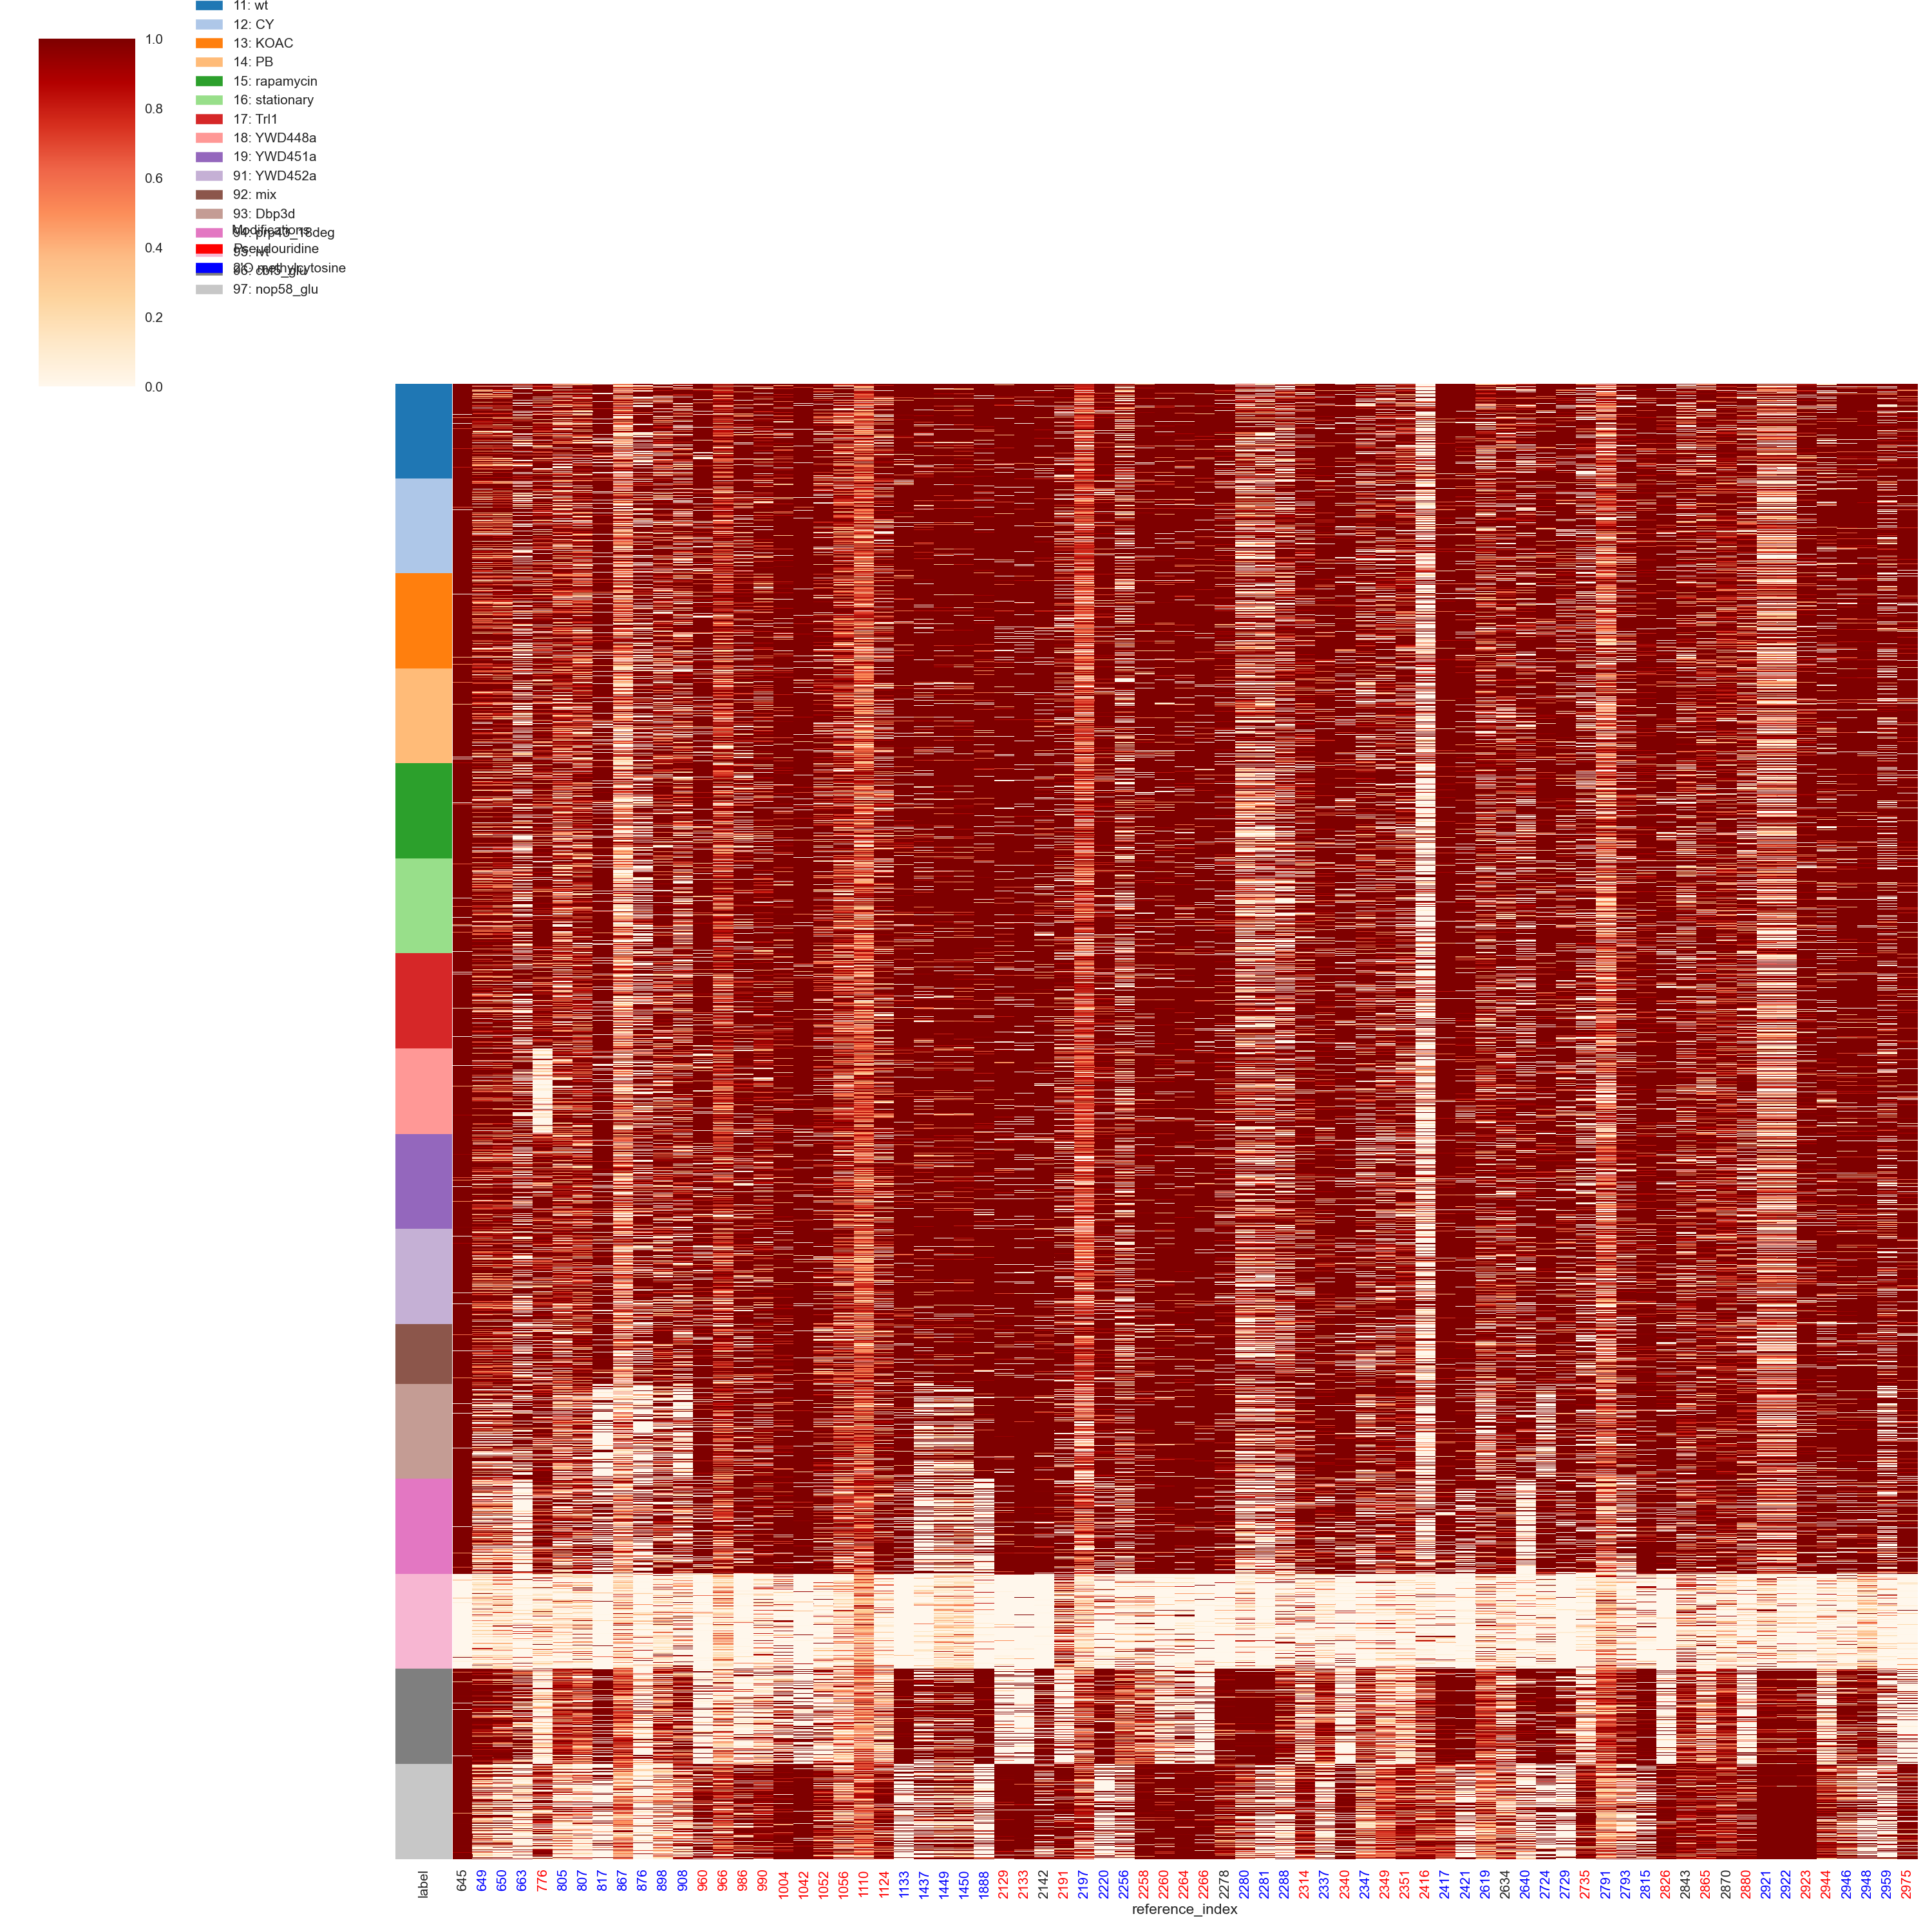

In [24]:
%matplotlib notebook

n = 300
save_fig_path = None
metric = 'euclidean'
metric = "correlation"
legend = True
method = 'average'
contig = 'RDN25-1'
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure2/{contig}_knockouts_wt.png"
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure4/{contig}_dendrogram_wt_prp43.png"
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/{contig}_dendrogram_all.png"
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure1/{contig}_dendrogram_wt_ivt_deps.png"
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure2/{contig}_dendrogram_mix.png"
save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure3/{contig}_heatmap_all.png"

vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                           metric=metric,
                           method=method, 
                           col_cluster=False,
                           row_cluster=False,
                           twoprimeo_pos=twoprimeo_pos,
                           pseduo_u_pos=pseduo_u_pos,
                          legend=legend)


In [ ]:
contig = 'RDN18-1'
save_fig_path = None
# save_fig_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/YWD448a/native_vs_YWD448a_18S.png"
cmap = "hot"
cmap = "Blues"

norm = None
pseudou="ql"
twoprimeo=["na", "ob", "pc", "qd"]
vc.plot_ld_heatmap(contig, vc.get_contig_positions(contig), stat="r2", cmap=cmap, norm=norm, figure_path=save_fig_path)


In [ ]:
contig = 'RDN25-1'
n_components = 2
n = 1000
save_fig_path = None
other_params = {"alpha": 0.8, "s":15}
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure2/{contig}_umap_wt_deps.png"
# save_fig_path = None
vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=n_components, figure_path=save_fig_path, n=n, **other_params)       

In [ ]:
n = 500
contig = 'RDN25-1'

figure_path = None
# figure_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/{n}_knockdowns_25S.png"
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure2/{contig}_dendrogram_wt_deps.png"
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure4/{contig}_dendrogram_wt_prp43.png"
save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/{contig}_dendrogram_all.png"

metric = 'euclidean'
metric = "correlation"

method = 'average'

vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                           metric=metric,
                           method=method, 
                           col_cluster=False,
                           row_cluster=False,
                           twoprimeo_pos=twoprimeo_pos,
                           pseduo_u_pos=pseduo_u_pos)


In [ ]:
contig = 'RDN25-1'
save_fig_path = None
# save_fig_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/YWD448a/native_vs_YWD448a_18S.png"
cmap = "hot"
cmap = "Blues"

norm = None
pseudou="ql"
twoprimeo=["na", "ob", "pc", "qd"]
vc.plot_ld_heatmap(contig, vc.get_contig_positions(contig), stat="r2", cmap=cmap, norm=norm, figure_path=save_fig_path)


In [ ]:
len(vc.get_X("RDN25-1", vc.get_contig_positions("RDN25-1")))

In [ ]:
len(vc.get_X("RDN18-1", vc.get_contig_positions("RDN18-1")))

In [ ]:
all_file_paths = [WT_YPD]
all_labels = ["1: wild type"]

vc = VariantCalls(all_file_paths, all_labels)


In [ ]:
contig = 'RDN25-1'
save_fig_path = None
# save_fig_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/YWD448a/native_vs_YWD448a_18S.png"
cmap = "hot"
cmap = "binary"
cmap = "Blues"

norm = None
pseudou="ql"
twoprimeo=["na", "ob", "pc", "qd"]
vc.plot_ld_heatmap(contig, vc.get_contig_positions(contig), stat="r2", cmap=cmap, norm=norm, figure_path=save_fig_path)


# Get positions which have largest difference in percent mod

In [ ]:
all_file_paths = [Dbp3d_YPD, WT_YPD]
all_labels = ["Dbp3d", "wt"]

vc = VariantCalls(all_file_paths, all_labels)


In [ ]:
contig = "RDN25-1"
positions = vc.get_contig_positions(contig)

X = vc.get_X(contig, positions)

In [ ]:
Dbp3d = X.loc[(slice(None), 'Dbp3d'), :]
wt = X.loc[(slice(None), 'wt'), :]


In [ ]:
differences = (wt.mean() - Dbp3d.mean()).sort_values(ascending=False)
differences.hist(bins=40)

In [ ]:
pd.set_option('display.max_rows', None)
print(differences)
pd.set_option('display.max_rows', 10)


## Split 25S clusters


In [ ]:
all_file_paths = [Dbp3d_YPD, WT_YPD]
all_labels = ["Dbp3d", "wt"]

vc = VariantCalls(all_file_paths, all_labels)


In [ ]:
pseudou="ql"
twoprimeo=["na", "ob", "pc", "qd"]
contig = "RDN25-1"


In [ ]:
positions = vc.get_contig_positions(contig)
data = vc.data[(vc.data["contig"] == contig) & (vc.data['reference_index'].isin(positions))]
df = data.pivot(index=['read_id', 'label'], columns=['reference_index'], values='prob2')
X = df.dropna()
Dbp3d = X.loc[(slice(None), 'Dbp3d'), :]
wt = X.loc[(slice(None), 'wt'), :]


In [ ]:
Dbp3d[[1436, 1448, 1449]].sum(axis=1).hist()

In [ ]:
X = Dbp3d[Dbp3d[[1436, 1448, 1449]].sum(axis=1) < 1]
print(len(X))

In [ ]:
contig = 'RDN25-1'
save_fig_path = None
# save_fig_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/YWD448a/native_vs_YWD448a_18S.png"
cmap = "hot"
cmap = "binary"
cmap = "Blues"

norm = None
pseudou="ql"
twoprimeo=["na", "ob", "pc", "qd"]
vc._plot_ld_heatmap(X, contig, stat="r2", cmap=cmap, norm=norm, figure_path=save_fig_path)


In [ ]:
X = Dbp3d[Dbp3d[[1436, 1448, 1449]].sum(axis=1) > 2]
print(len(X))

In [ ]:
contig = 'RDN25-1'
save_fig_path = None
# save_fig_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/YWD448a/native_vs_YWD448a_18S.png"
cmap = "hot"
cmap = "binary"
cmap = "Blues"

norm = None
pseudou="ql"
twoprimeo=["na", "ob", "pc", "qd"]
vc._plot_ld_heatmap(X, contig, stat="r2", cmap=cmap, norm=norm, figure_path=save_fig_path)
